### **NOTEBOOK WHERE DEEPLABV3** 

**Lets try the model in the Nelissen data.**

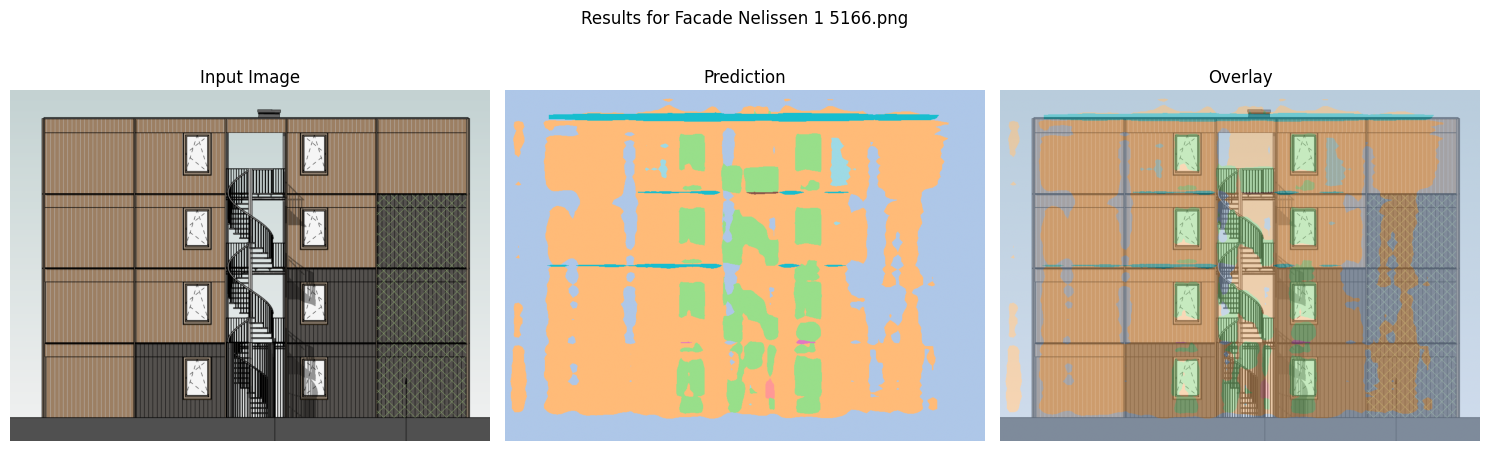

Processed: Facade Nelissen 1 5166.png


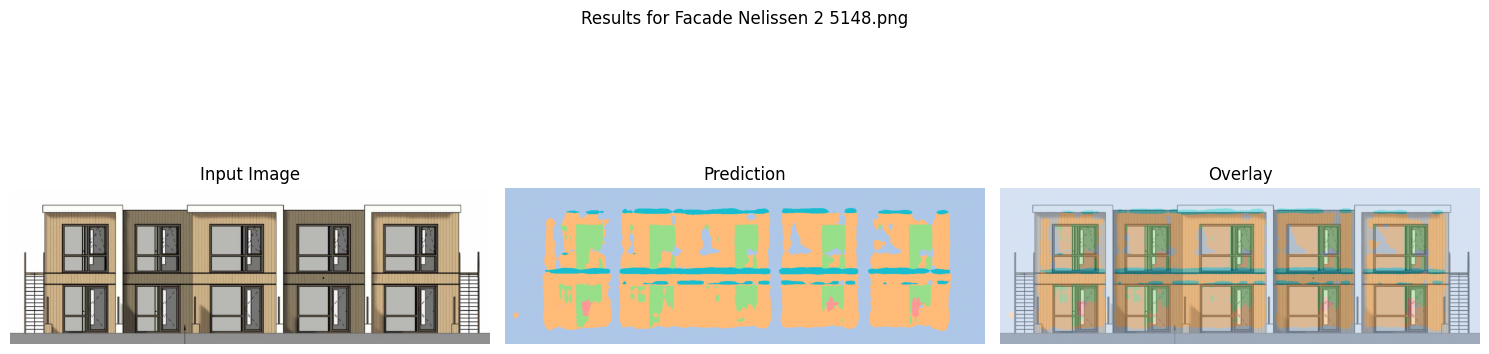

Processed: Facade Nelissen 2 5148.png


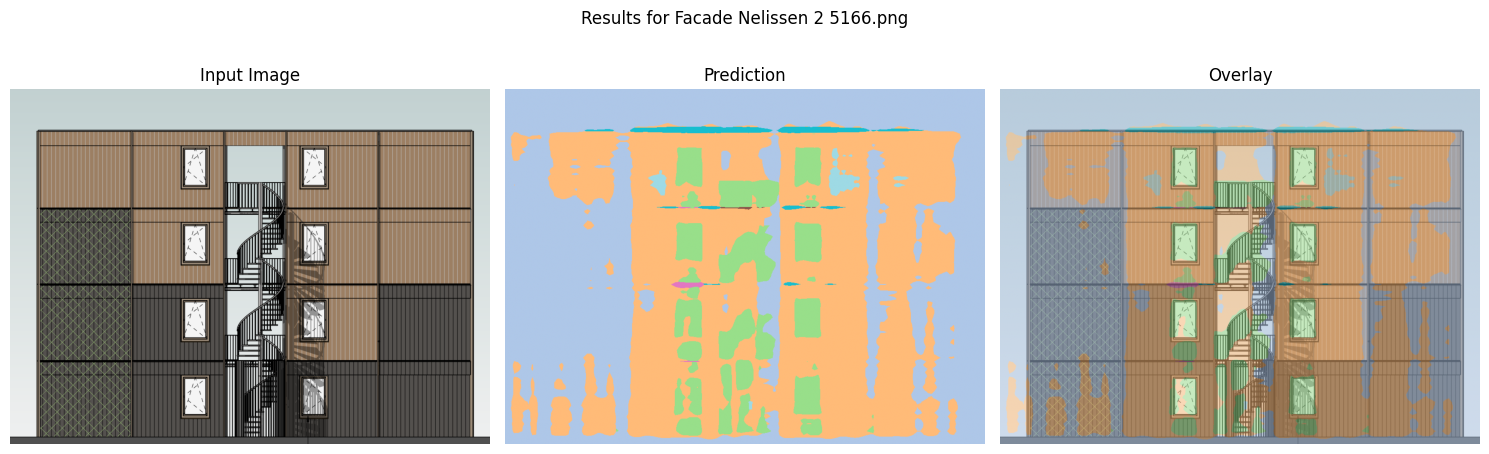

Processed: Facade Nelissen 2 5166.png


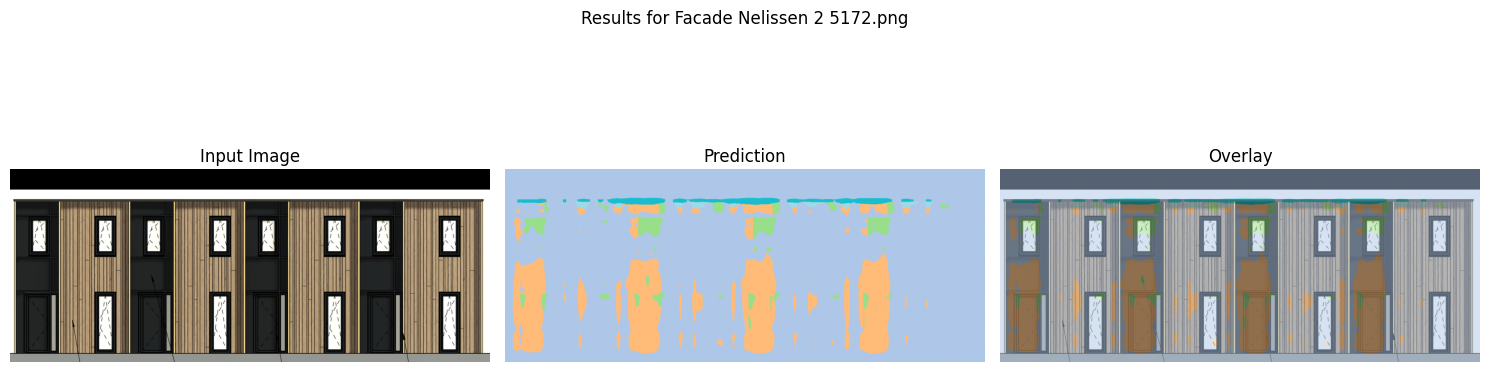

Processed: Facade Nelissen 2 5172.png


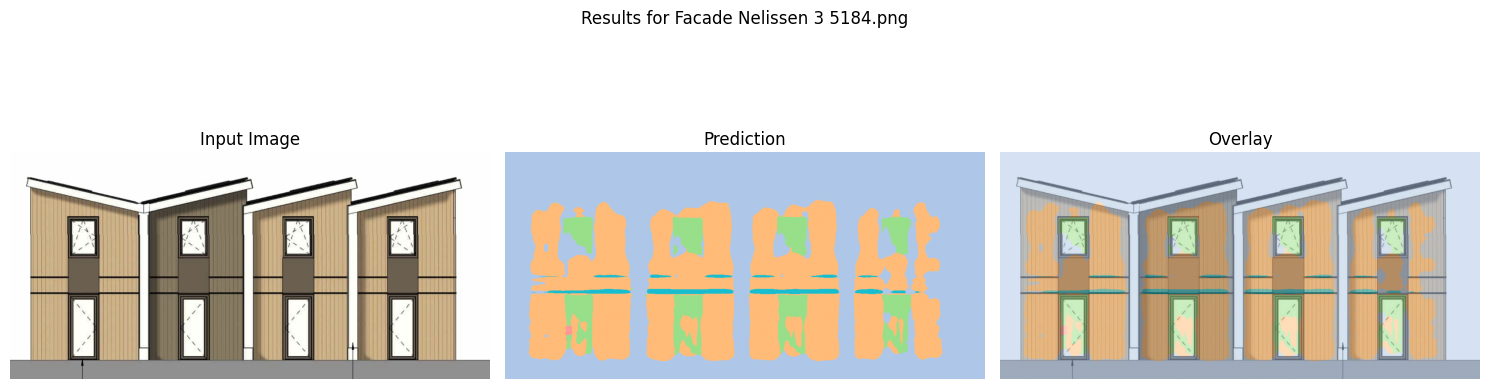

Processed: Facade Nelissen 3 5184.png


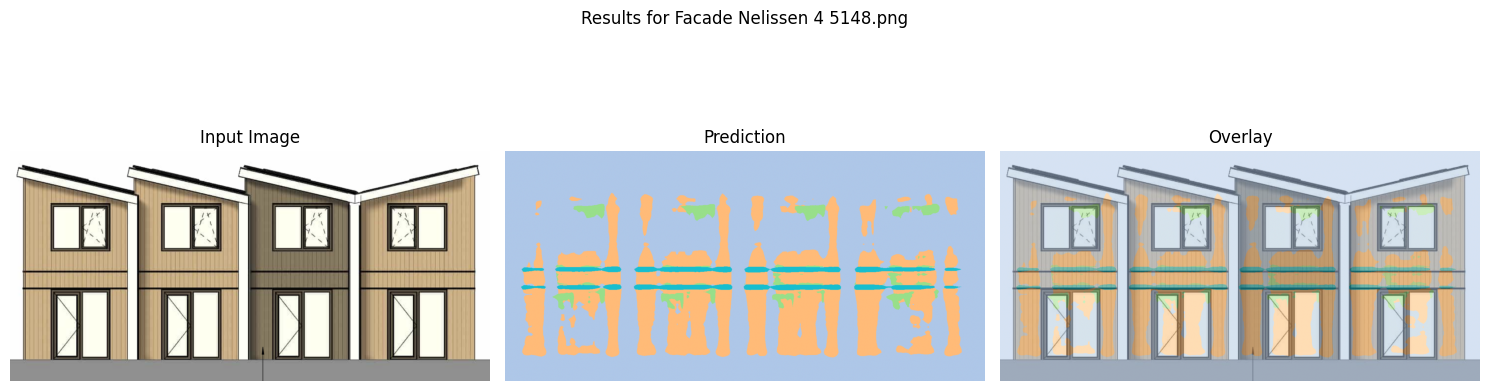

Processed: Facade Nelissen 4 5148.png


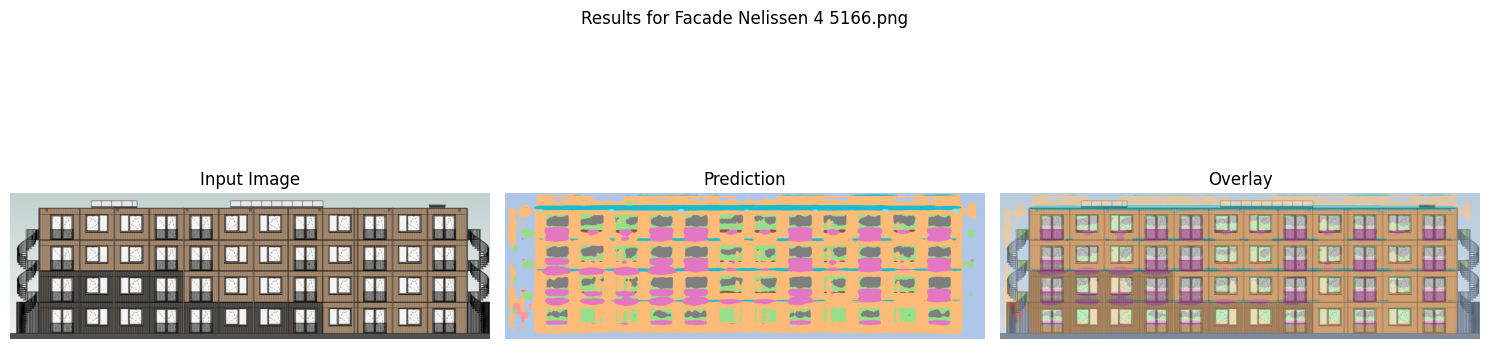

Processed: Facade Nelissen 4 5166.png


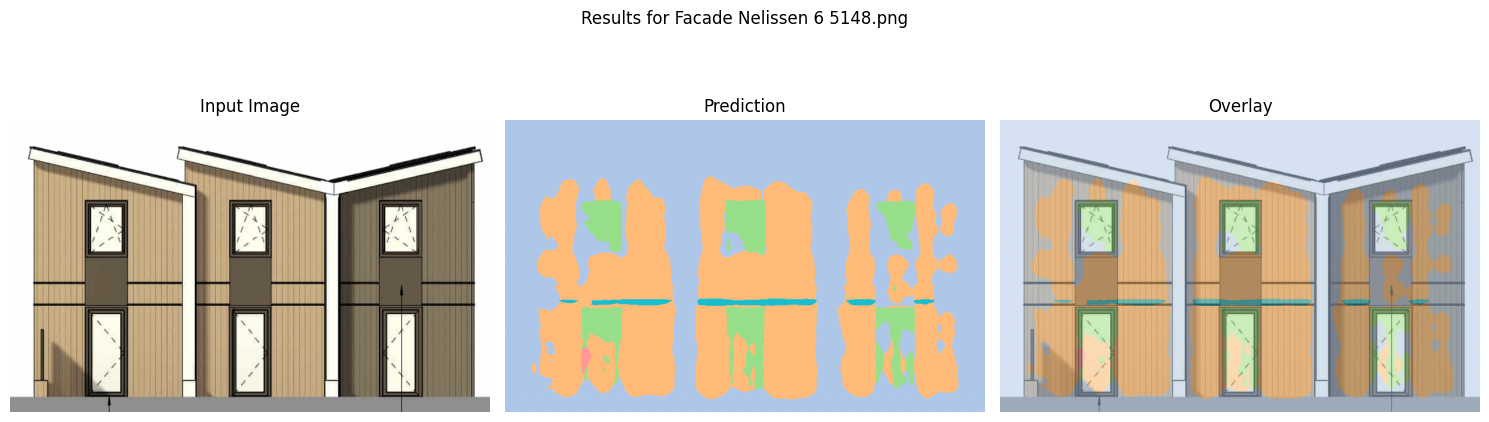

Processed: Facade Nelissen 6 5148.png


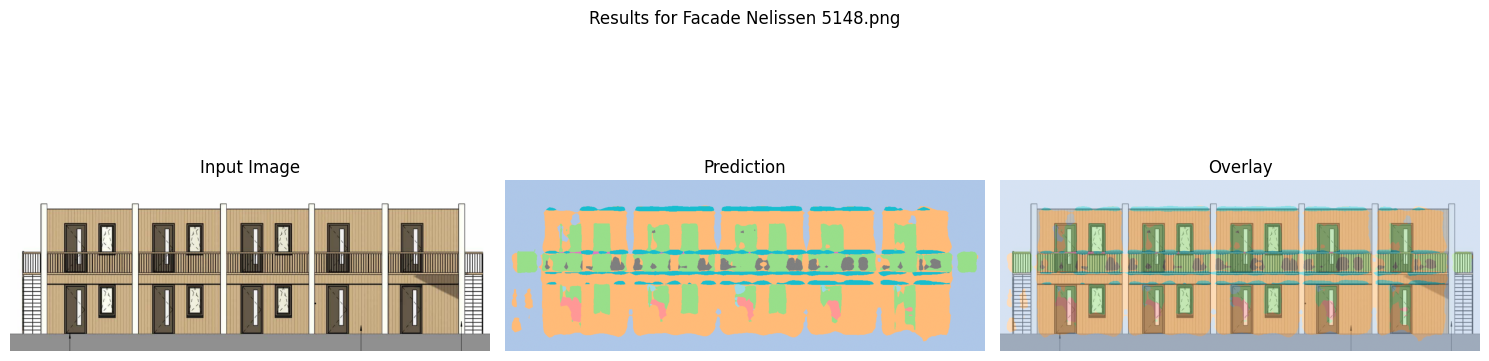

Processed: Facade Nelissen 5148.png


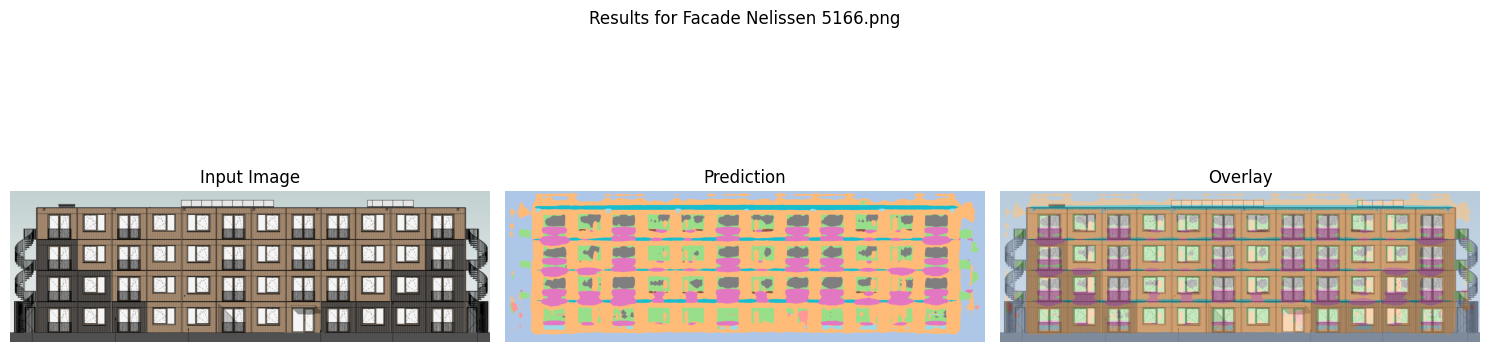

Processed: Facade Nelissen 5166.png


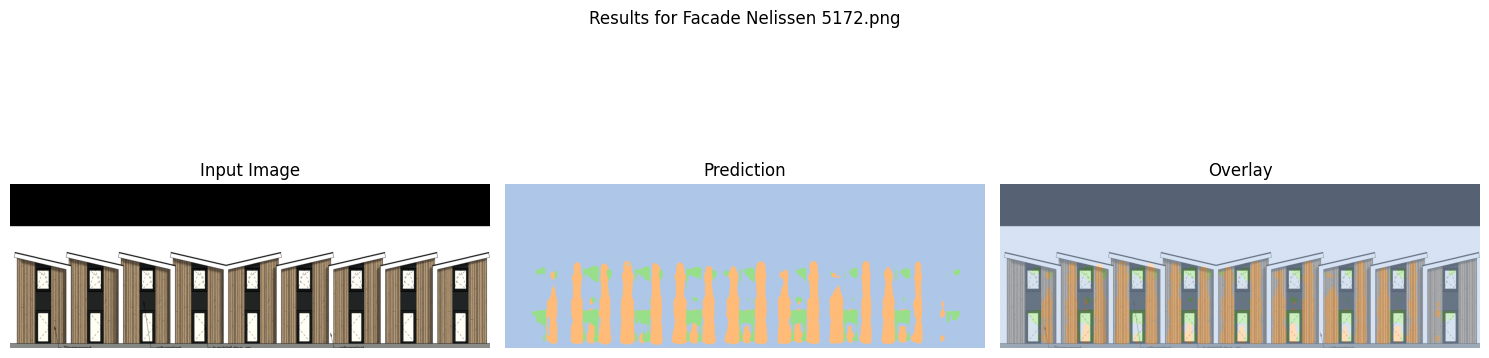

Processed: Facade Nelissen 5172.png


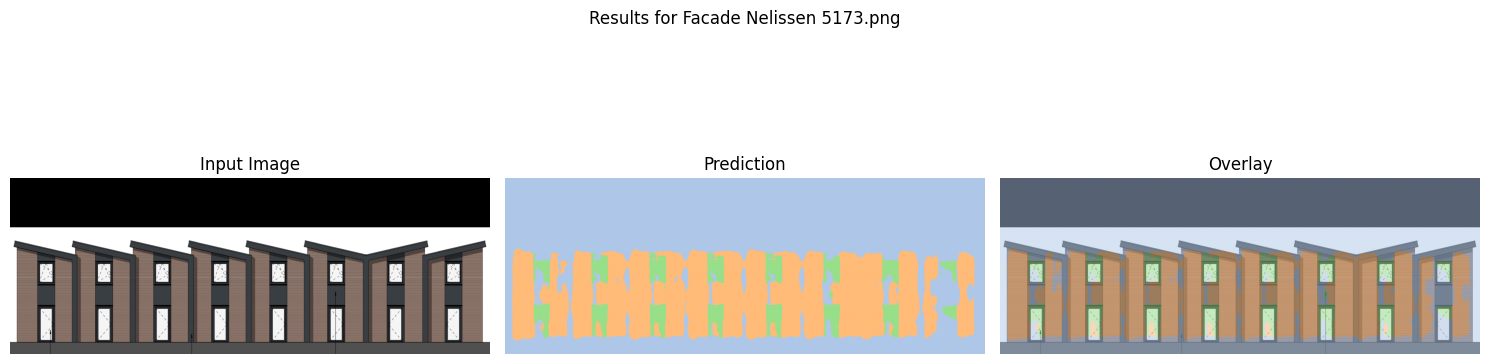

Processed: Facade Nelissen 5173.png


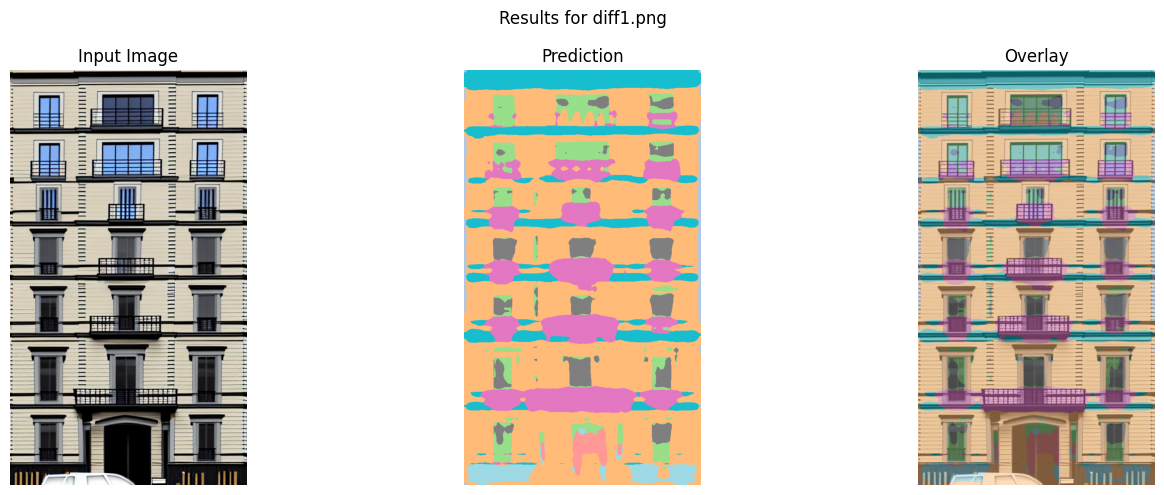

Processed: diff1.png


In [6]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from torchvision import models
from PIL import Image
import os

# Configure device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Load the model
model = models.segmentation.deeplabv3_resnet50(pretrained=False, num_classes=12)
state_dict = torch.load("../model_archive/DeepLabv3/deeplabv3_phase1.pth", map_location=device)
filtered_state_dict = {k: v for k, v in state_dict.items() if not k.startswith("aux_classifier.")}
model.load_state_dict(filtered_state_dict, strict=False)
model.to(device)
model.eval()

# List of image paths
image_paths = [
    "../data-samples/Nelissen Fotos/Facade Nelissen 1 5166.png",
    "../data-samples/Nelissen Fotos/Facade Nelissen 2 5148.png",
    "../data-samples/Nelissen Fotos/Facade Nelissen 2 5166.png",
    "../data-samples/Nelissen Fotos/Facade Nelissen 2 5172.png",
    "../data-samples/Nelissen Fotos/Facade Nelissen 3 5184.png",
    "../data-samples/Nelissen Fotos/Facade Nelissen 4 5148.png",
    "../data-samples/Nelissen Fotos/Facade Nelissen 4 5166.png",
    "../data-samples/Nelissen Fotos/Facade Nelissen 6 5148.png",
    "../data-samples/Nelissen Fotos/Facade Nelissen 5148.png",
    "../data-samples/Nelissen Fotos/Facade Nelissen 5166.png",
    "../data-samples/Nelissen Fotos/Facade Nelissen 5172.png",
    "../data-samples/Nelissen Fotos/Facade Nelissen 5173.png",
    "../data/dump/diff1.png",
]

results = []

# Process each image
for image_path in image_paths:
    filename = os.path.basename(image_path)
    name = os.path.splitext(filename)[0]

    # Load image
    image = Image.open(image_path).convert("RGB")
    image_np = np.array(image)
    image_tensor = torch.from_numpy(image_np).permute(2, 0, 1).float() / 255.0
    image_tensor = image_tensor.unsqueeze(0).to(device)

    # Inference
    with torch.no_grad():
        output = model(image_tensor)['out']
        prediction = torch.argmax(output, dim=1).squeeze(0).cpu().numpy()

    # Store result
    results.append({
        "filename": filename,
        "image": image_np,
        "prediction": prediction
    })

    # Plot
    fig, axs = plt.subplots(1, 3, figsize=(15, 5))
    axs[0].imshow(image_np)
    axs[0].set_title("Input Image")
    axs[0].axis("off")

    axs[1].imshow(prediction, cmap="tab20", vmin=0, vmax=11)
    axs[1].set_title("Prediction")
    axs[1].axis("off")

    axs[2].imshow(image_np)
    axs[2].imshow(prediction, cmap="tab20", vmin=0, vmax=11, alpha=0.5)
    axs[2].set_title("Overlay")
    axs[2].axis("off")

    plt.suptitle(f"Results for {filename}")
    plt.tight_layout()
    plt.show()

    print(f"Processed: {filename}")


RESULTS

Lets evaluate the results in a better way when they are preprocessed